# Cancer Detection

One of the great benefits of computer vision is that it can greatly simplify and automate otherwise tedious
tasks. For example, in some branches of biomedical research, researchers often have to count or annotate
specific particles microscopic images such as the one seen below. Aside from being a very tedious task, this
task can be very time consuming as well as error-prone.

![alt text](https://www.robots.ox.ac.uk/~vgg/research/cell_detection/images/histo.png)

In this project you will explore simple methods for assisting in cancer detection. You will build an intuition on a polka-dot example, then try to detect cells from a real Oxford cancer dataset!

# Part 1: Setup

In [2]:
#@title
!rm -r ai4all_cancer_detection
!git clone https://github.com/crockwell/ai4all_cancer_detection
!cp -r ai4all_cancer_detection/* . && echo "=== Files Copied ==="

rm: cannot remove 'ai4all_cancer_detection': No such file or directory
Cloning into 'ai4all_cancer_detection'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 39 (delta 11), reused 32 (delta 4), pack-reused 0
Unpacking objects: 100% (39/39), done.
=== Files Copied ===


In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import cv2 
from blob_detection import gaussian_filter, find_maxima, \
                    visualize_scale_space, visualize_maxima, scale_space
import common

# Part 2: Detection using Single Filter

We're going to start by using a single filter, the same as we did yesterday.

Read in the "polka.png" image and display it:

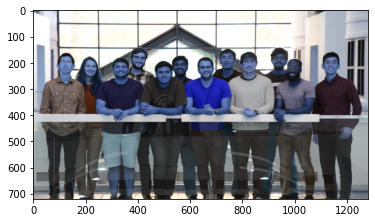

In [5]:
# Load a color image
my_img = cv2.imread('cv.png')
plt.imshow(my_img)
plt.show()

# polka_ = cv2.cvtColor(polka_, cv2.COLOR_RGB2GRAY )
# polka_ = cv2.GaussianBlur(polka_, (5,5), 3)

# plt.imshow(polka_)
# plt.show()
# polka = polka_ / 255.

As we saw in the tennis example, the filter blurs the image according to the filter size: bigger is blurrier.

Below, we show the blurred polka dots.

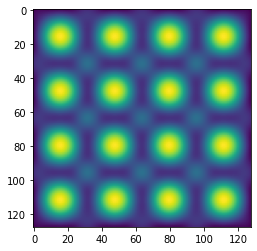

In [ ]:
sigma_1 = 5

gauss_1 = gaussian_filter(polka, sigma_1)
plt.imshow(gauss_1)

Today we'll mark detections (using thresholding) with red circles. 

Below is what the blurred image looks like if we threshold: the red circles line up pretty well with the dots!


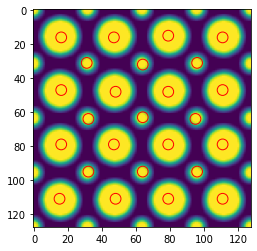

In [ ]:
maxima = find_maxima(gauss_1, k_xy=int(sigma_1))
visualize_maxima(polka, maxima, sigma_1, 1)

But this isn't perfect! The red dots don't line up with the big and small polka dots. 

Two filters are even better. Why? Two filters helps us look at edges.

# Part 3: Detection using Two Filters

Using two filters of different sizes means we subtract a smaller blurred patch from a bigger blurred patch.

Instead of a circle, now you have a doughnut!

Part 1: Try changing sigma_1 and sigma_2 to see if you can match the polka dots

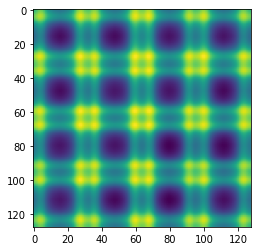

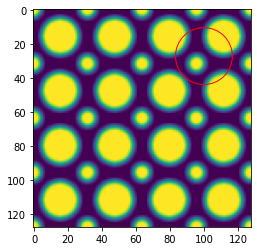

In [ ]:
### START OF YOUR CODE
### CHANGE sigma_1 and sigma_2 ###
sigma_1 = 140
sigma_2 = 190
### END OF YOUR CODE

gauss_1 = gaussian_filter(polka, sigma_1)
gauss_2 = gaussian_filter(polka, sigma_2)
DoG_small = gauss_2 - gauss_1
plt.imshow(DoG_small)
maxima = find_maxima(DoG_small, k_xy=int(sigma_1))
visualize_maxima(polka, maxima, sigma_1, sigma_2 / sigma_1)

Part 2: Once you were able to detect the small polka dots, choose new values for "sigma1" and "sigma2" so that you can detect the large polka dots!

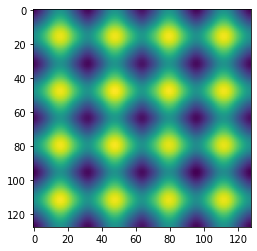

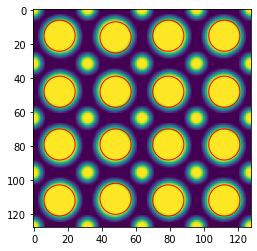

In [ ]:
### START OF YOUR CODE
### CHANGE sigma_1 and sigma_2 ###
sigma_1 = 31
sigma_2 = 42
### END OF YOUR CODE

from scipy.signal import convolve2d as convolve
def gaussian_filter(image, sigma):
    H, W = image.shape
    kernel_size = int(2 * np.ceil(2 * sigma) + 1)
    kernel_size = min(kernel_size, min(H, W) // 2)
    if kernel_size % 2 == 0:
        kernel_size = kernel_size + 1
    output = None
    k_h = kernel_size // 2
    g_1d = np.arange(-k_h, k_h + 1)[:, None]**2
    g_2d = -1 * (g_1d + g_1d.T)
    g_kern = np.exp(g_2d / (2 * sigma**2)) / (2 * np.pi * sigma**2)
    output = convolve(image, g_kern, mode='same', boundary='wrap')
    return output

gauss_1 = gaussian_filter(polka, sigma_1)
gauss_2 = gaussian_filter(polka, sigma_2)
DoG_large = gauss_2 - gauss_1
plt.imshow(DoG_large)
maxima = find_maxima(DoG_large, k_xy=int(10))
visualize_maxima(polka, maxima, sigma_2, sigma_2 / sigma_1)

# Part 4: Cancer Cell Detection

Okay, now we are ready to detect cancer cells!

Part 1: Take a look at this example image gathered in an important dataset by the Oxford Visual Geometry Group.

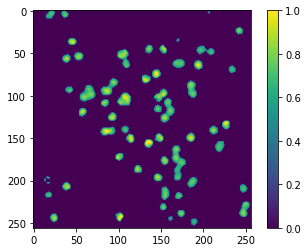

In [7]:
# now use this for counting cells!
# Load a color image
cell1_ = cv2.imread('images/003cell.png')
cell1_ = cv2.cvtColor(cell1_, cv2.COLOR_RGB2GRAY )

cell1 = cell1_ / cell1_.max()

cell1[cell1 < 0.5] = 0
#cell1 = cv2.blur(cell1, ksize=(3,3))

plt.imshow(cell1)
plt.colorbar()
plt.show()

Part 2:

Try using all you have learned to find as many cells as possible, without making too many mistakes!

Does one filter work? Two? Three? What values of sigma? How about combining more than one "DoG" to get cells of different size?

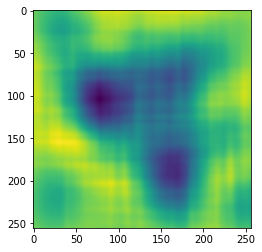

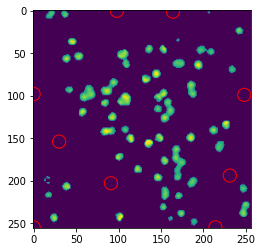

In [9]:
### START OF YOUR CODE
### CHANGE sigma_1 and sigma_2 ###
sigma_1 = 30
sigma_2 = 40
### END OF YOUR CODE

gauss_1 = gaussian_filter(cell1, sigma_1)
gauss_2 = gaussian_filter(cell1, sigma_2)

### CHANGE DoG (maybe??) ###
DoG = gauss_2 - gauss_1
# DoG = gauss_2
### END OF YOUR CODE

maxima = find_maxima(DoG, k_xy=int(sigma_2))
plt.imshow(DoG)
plt.show()
visualize_maxima(cell1, maxima, sigma_1, sigma_2 / sigma_1)

Here's what actual medical professionals said was the cancer cells. How does your model compare? 

It's okay if it isn't perfect! If you were working on this problem professionally, you would spend a lot of time learning more and more complex techniques to make this better and better.

In [ ]:
dots1 = cv2.imread('images/003dots.png')
dots1 = cv2.cvtColor(dots1, cv2.COLOR_RGB2GRAY )

dots1 = gaussian_filter(dots1, 2)
plt.imshow(dots1)
plt.show()